# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [16]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import torch
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


IMAGE_PATH = 'img_align_celeba/'
image_size = 64
# SAMPLE_PATH = '../'

# if not os.path.exists(SAMPLE_PATH):
#     os.makedirs(SAMPLE_PATH)
    
    
transform = transforms.Compose([
    #transforms.Scale(image_size),
    transforms.Resize(image_size),
    transforms.CenterCrop((image_size,image_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
data_loader = ImageFolder(IMAGE_PATH, transform)


#data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=True)
valid_loader, train_loader, test_loader = get_celeba_dataloader(data_loader, 
                                                                batch_size=128)
test_batch = iter(test_loader)
test_batch = next(test_batch)
new_labels =torch.tensor(test_batch[1])
print(torch.tensor(test_batch[0]).shape)
#latent_dist = model.encode(torch.tensor(test_batch[0]).cuda())




162079 20259 20261
torch.Size([128, 3, 64, 64])


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


### Define latent distribution of the model

In [17]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.VAEmodel_f import VAE
from jointvae.training_l import Trainer
from torch import optim
from viz.visualize_l import Visualizer
import matplotlib.pyplot as plt
import numpy as np



#valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 64
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
#model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 2
lambda_od = 10*lambda_d
lambda_dis = 30*lambda_d 
path="ReportFig/DIP-VAE/face/cont_{}/gamma_ {}lambda{}".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=64, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=64, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=74, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [18]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'modelDIPf_params.pkl')
torch.save(model, './modelDIPf')
##15.078 - 0.0147  17.209 - 0.0168 error tanh 
##LR 1e-3 0.019-0.023 worse should pick 5e-4
##PLOT THE CURVE!!!!!
#16-2033.294813156128 32-2846.2241864204407

0/162079	Loss: 1586.240
6400/162079	Loss: 1455.806
12800/162079	Loss: 1150.580
19200/162079	Loss: 978.102
25600/162079	Loss: 797.058
32000/162079	Loss: 684.926
38400/162079	Loss: 647.899
44800/162079	Loss: 619.032
51200/162079	Loss: 599.629
57600/162079	Loss: 575.127
64000/162079	Loss: 561.442
70400/162079	Loss: 552.138
76800/162079	Loss: 539.005
83200/162079	Loss: 528.025
89600/162079	Loss: 516.636
96000/162079	Loss: 510.704
102400/162079	Loss: 502.775
108800/162079	Loss: 498.105
115200/162079	Loss: 493.092
121600/162079	Loss: 487.459
128000/162079	Loss: 489.575
134400/162079	Loss: 478.914
140800/162079	Loss: 476.339
147200/162079	Loss: 470.280
153600/162079	Loss: 469.239
160000/162079	Loss: 464.719
Valid Loss: 470.730, Recon Error: 0.084
470.72976665376865
Epoch: 1 Average loss: 621.02 Valid loss: 470.72976665376865	Recon Error:0.084
0/162079	Loss: 446.423
6400/162079	Loss: 463.241
12800/162079	Loss: 459.648
19200/162079	Loss: 462.123
25600/162079	Loss: 458.448
32000/162079	Loss: 457

140800/162079	Loss: 365.598
147200/162079	Loss: 368.806
153600/162079	Loss: 368.385
160000/162079	Loss: 367.818
Valid Loss: 377.606, Recon Error: 0.056
377.60605875651044
Epoch: 10 Average loss: 368.12 Valid loss: 377.60605875651044	Recon Error:0.056
0/162079	Loss: 376.564
6400/162079	Loss: 366.437
12800/162079	Loss: 365.298
19200/162079	Loss: 365.577
25600/162079	Loss: 365.469
32000/162079	Loss: 364.814
38400/162079	Loss: 366.743
44800/162079	Loss: 369.015
51200/162079	Loss: 367.818
57600/162079	Loss: 366.838
64000/162079	Loss: 369.420
70400/162079	Loss: 366.088
76800/162079	Loss: 364.990
83200/162079	Loss: 366.298
89600/162079	Loss: 366.284
96000/162079	Loss: 366.671
102400/162079	Loss: 365.391
108800/162079	Loss: 364.011
115200/162079	Loss: 364.639
121600/162079	Loss: 365.108
128000/162079	Loss: 365.970
134400/162079	Loss: 365.864
140800/162079	Loss: 366.354
147200/162079	Loss: 365.679
153600/162079	Loss: 364.864
160000/162079	Loss: 364.840
Valid Loss: 374.051, Recon Error: 0.048
37

83200/162079	Loss: 356.811
89600/162079	Loss: 354.636
96000/162079	Loss: 354.709
102400/162079	Loss: 355.803
108800/162079	Loss: 357.077
115200/162079	Loss: 355.813
121600/162079	Loss: 354.852
128000/162079	Loss: 356.378
134400/162079	Loss: 356.827
140800/162079	Loss: 356.703
147200/162079	Loss: 354.201
153600/162079	Loss: 356.056
160000/162079	Loss: 355.017
Valid Loss: 362.797, Recon Error: 0.045
362.79724965605345
Epoch: 20 Average loss: 356.33 Valid loss: 362.79724965605345	Recon Error:0.045
0/162079	Loss: 370.558
6400/162079	Loss: 355.432
12800/162079	Loss: 356.821
19200/162079	Loss: 355.474
25600/162079	Loss: 355.194
32000/162079	Loss: 356.778
38400/162079	Loss: 356.297
44800/162079	Loss: 355.766
51200/162079	Loss: 354.237
57600/162079	Loss: 356.744
64000/162079	Loss: 352.591
70400/162079	Loss: 355.009
76800/162079	Loss: 353.545
83200/162079	Loss: 354.853
89600/162079	Loss: 355.696
96000/162079	Loss: 356.017
102400/162079	Loss: 356.648
108800/162079	Loss: 355.365
115200/162079	Los

25600/162079	Loss: 351.495
32000/162079	Loss: 348.174
38400/162079	Loss: 349.130
44800/162079	Loss: 352.067
51200/162079	Loss: 349.419
57600/162079	Loss: 351.472
64000/162079	Loss: 350.191
70400/162079	Loss: 349.729
76800/162079	Loss: 351.464
83200/162079	Loss: 350.352
89600/162079	Loss: 350.487
96000/162079	Loss: 351.905
102400/162079	Loss: 351.137
108800/162079	Loss: 349.865
115200/162079	Loss: 349.901
121600/162079	Loss: 351.529
128000/162079	Loss: 349.636
134400/162079	Loss: 350.469
140800/162079	Loss: 350.213
147200/162079	Loss: 349.229
153600/162079	Loss: 348.641
160000/162079	Loss: 350.547
Valid Loss: 355.256, Recon Error: 0.043
355.2563401708063
Epoch: 30 Average loss: 350.75 Valid loss: 355.2563401708063	Recon Error:0.043
0/162079	Loss: 347.329
6400/162079	Loss: 350.272
12800/162079	Loss: 349.297
19200/162079	Loss: 349.287
25600/162079	Loss: 350.527
32000/162079	Loss: 348.910
38400/162079	Loss: 349.662
44800/162079	Loss: 349.730
51200/162079	Loss: 349.560
57600/162079	Loss: 35

Valid Loss: 355.910, Recon Error: 0.044
355.9103572053729
Epoch: 39 Average loss: 348.25 Valid loss: 355.9103572053729	Recon Error:0.044
0/162079	Loss: 343.921
6400/162079	Loss: 350.872
12800/162079	Loss: 347.313
19200/162079	Loss: 347.655
25600/162079	Loss: 347.314
32000/162079	Loss: 348.839
38400/162079	Loss: 349.788
44800/162079	Loss: 345.465
51200/162079	Loss: 347.756
57600/162079	Loss: 347.481
64000/162079	Loss: 347.293
70400/162079	Loss: 348.234
76800/162079	Loss: 347.788
83200/162079	Loss: 347.166
89600/162079	Loss: 347.829
96000/162079	Loss: 347.630
102400/162079	Loss: 349.455
108800/162079	Loss: 346.532
115200/162079	Loss: 347.679
121600/162079	Loss: 347.189
128000/162079	Loss: 347.260
134400/162079	Loss: 348.079
140800/162079	Loss: 347.675
147200/162079	Loss: 348.037
153600/162079	Loss: 348.756
160000/162079	Loss: 345.045
Valid Loss: 354.721, Recon Error: 0.055
354.72069717503194
Epoch: 40 Average loss: 348.03 Valid loss: 354.72069717503194	Recon Error:0.055
0/162079	Loss: 35

108800/162079	Loss: 345.186
115200/162079	Loss: 346.663
121600/162079	Loss: 345.921
128000/162079	Loss: 344.475
134400/162079	Loss: 347.093
140800/162079	Loss: 346.122
147200/162079	Loss: 345.906
153600/162079	Loss: 346.047
160000/162079	Loss: 347.243
Valid Loss: 350.952, Recon Error: 0.043
350.95202291236734
Epoch: 49 Average loss: 346.02 Valid loss: 350.95202291236734	Recon Error:0.043
0/162079	Loss: 344.697
6400/162079	Loss: 346.770
12800/162079	Loss: 345.516
19200/162079	Loss: 345.697
25600/162079	Loss: 346.353
32000/162079	Loss: 345.448
38400/162079	Loss: 345.172
44800/162079	Loss: 347.262
51200/162079	Loss: 344.547
57600/162079	Loss: 343.739
64000/162079	Loss: 346.810
70400/162079	Loss: 346.218
76800/162079	Loss: 345.896
83200/162079	Loss: 344.784
89600/162079	Loss: 343.680
96000/162079	Loss: 346.488
102400/162079	Loss: 346.761
108800/162079	Loss: 344.102
115200/162079	Loss: 345.666
121600/162079	Loss: 346.475
128000/162079	Loss: 345.912
134400/162079	Loss: 345.887
140800/162079	

51200/162079	Loss: 343.567
57600/162079	Loss: 344.094
64000/162079	Loss: 342.322
70400/162079	Loss: 344.146
76800/162079	Loss: 345.848
83200/162079	Loss: 341.615
89600/162079	Loss: 342.821
96000/162079	Loss: 345.783
102400/162079	Loss: 341.388
108800/162079	Loss: 343.240
115200/162079	Loss: 343.741
121600/162079	Loss: 345.563
128000/162079	Loss: 343.552
134400/162079	Loss: 343.750
140800/162079	Loss: 343.497
147200/162079	Loss: 345.659
153600/162079	Loss: 343.022
160000/162079	Loss: 344.807
Valid Loss: 350.510, Recon Error: 0.042
350.50980055707055
Epoch: 59 Average loss: 344.30 Valid loss: 350.50980055707055	Recon Error:0.042
0/162079	Loss: 336.787
6400/162079	Loss: 344.753
12800/162079	Loss: 342.969
19200/162079	Loss: 344.001
25600/162079	Loss: 343.290
32000/162079	Loss: 343.134
38400/162079	Loss: 345.228
44800/162079	Loss: 343.494
51200/162079	Loss: 342.479
57600/162079	Loss: 343.570
64000/162079	Loss: 344.236
70400/162079	Loss: 343.905
76800/162079	Loss: 344.374
83200/162079	Loss: 

0/162079	Loss: 339.197
6400/162079	Loss: 343.825
12800/162079	Loss: 340.969
19200/162079	Loss: 344.129
25600/162079	Loss: 340.706
32000/162079	Loss: 343.662
38400/162079	Loss: 341.621
44800/162079	Loss: 342.430
51200/162079	Loss: 342.740
57600/162079	Loss: 344.774
64000/162079	Loss: 342.310
70400/162079	Loss: 341.776
76800/162079	Loss: 342.843
83200/162079	Loss: 343.636
89600/162079	Loss: 341.851
96000/162079	Loss: 341.784
102400/162079	Loss: 342.052
108800/162079	Loss: 341.231
115200/162079	Loss: 342.581
121600/162079	Loss: 343.973
128000/162079	Loss: 341.391
134400/162079	Loss: 342.635
140800/162079	Loss: 342.531
147200/162079	Loss: 342.162
153600/162079	Loss: 344.258
160000/162079	Loss: 342.209
Valid Loss: 347.765, Recon Error: 0.043
347.7653108032994
Epoch: 69 Average loss: 342.80 Valid loss: 347.7653108032994	Recon Error:0.043
0/162079	Loss: 344.600
6400/162079	Loss: 344.419
12800/162079	Loss: 342.424
19200/162079	Loss: 342.313
25600/162079	Loss: 340.626
32000/162079	Loss: 344.130

140800/162079	Loss: 341.567
147200/162079	Loss: 341.357
153600/162079	Loss: 342.666
160000/162079	Loss: 342.286
Valid Loss: 347.273, Recon Error: 0.046
347.2725246597386
Epoch: 78 Average loss: 341.97 Valid loss: 347.2725246597386	Recon Error:0.046
0/162079	Loss: 337.588
6400/162079	Loss: 341.830
12800/162079	Loss: 342.291
19200/162079	Loss: 342.688
25600/162079	Loss: 342.154
32000/162079	Loss: 342.985
38400/162079	Loss: 340.707
44800/162079	Loss: 340.850
51200/162079	Loss: 341.388
57600/162079	Loss: 342.884
64000/162079	Loss: 339.986
70400/162079	Loss: 342.116
76800/162079	Loss: 340.308
83200/162079	Loss: 341.102
89600/162079	Loss: 342.251
96000/162079	Loss: 341.512
102400/162079	Loss: 342.439
108800/162079	Loss: 341.354
115200/162079	Loss: 341.496
121600/162079	Loss: 340.439
128000/162079	Loss: 341.380
134400/162079	Loss: 339.828
140800/162079	Loss: 343.707
147200/162079	Loss: 340.752
153600/162079	Loss: 340.352
160000/162079	Loss: 343.104
Valid Loss: 347.851, Recon Error: 0.043
347.

83200/162079	Loss: 340.270
89600/162079	Loss: 340.873
96000/162079	Loss: 340.327
102400/162079	Loss: 341.560
108800/162079	Loss: 340.981
115200/162079	Loss: 339.999
121600/162079	Loss: 340.358
128000/162079	Loss: 342.092
134400/162079	Loss: 340.675
140800/162079	Loss: 341.293
147200/162079	Loss: 342.677
153600/162079	Loss: 341.962
160000/162079	Loss: 340.532
Valid Loss: 347.575, Recon Error: 0.039
347.57538417600233
Epoch: 88 Average loss: 341.20 Valid loss: 347.57538417600233	Recon Error:0.039
0/162079	Loss: 333.962
6400/162079	Loss: 344.797
12800/162079	Loss: 340.836
19200/162079	Loss: 341.713
25600/162079	Loss: 338.776
32000/162079	Loss: 340.573
38400/162079	Loss: 341.264
44800/162079	Loss: 338.576
51200/162079	Loss: 341.646
57600/162079	Loss: 340.949
64000/162079	Loss: 341.769
70400/162079	Loss: 340.648
76800/162079	Loss: 341.158
83200/162079	Loss: 342.070
89600/162079	Loss: 340.414
96000/162079	Loss: 340.588
102400/162079	Loss: 341.330
108800/162079	Loss: 342.049
115200/162079	Los

25600/162079	Loss: 339.700
32000/162079	Loss: 339.918
38400/162079	Loss: 339.877
44800/162079	Loss: 339.203
51200/162079	Loss: 339.840
57600/162079	Loss: 339.058
64000/162079	Loss: 339.501
70400/162079	Loss: 341.025
76800/162079	Loss: 340.339
83200/162079	Loss: 340.617
89600/162079	Loss: 339.393
96000/162079	Loss: 342.307
102400/162079	Loss: 340.646
108800/162079	Loss: 340.864
115200/162079	Loss: 340.327
121600/162079	Loss: 339.638
128000/162079	Loss: 340.562
134400/162079	Loss: 341.104
140800/162079	Loss: 338.027
147200/162079	Loss: 340.797
153600/162079	Loss: 339.944
160000/162079	Loss: 341.167
Valid Loss: 345.006, Recon Error: 0.042
345.00592002628736
Epoch: 98 Average loss: 340.44 Valid loss: 345.00592002628736	Recon Error:0.042
0/162079	Loss: 342.328
6400/162079	Loss: 341.105
12800/162079	Loss: 338.511
19200/162079	Loss: 339.888
25600/162079	Loss: 339.973
32000/162079	Loss: 339.097
38400/162079	Loss: 340.007
44800/162079	Loss: 338.679
51200/162079	Loss: 342.294
57600/162079	Loss: 

In [19]:
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model.load_state_dict(torch.load('modelDIPf_params.pkl'))
#path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))
print(lr)
if not os.path.exists(path):
    os.makedirs(path)

28520
0.0005


# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

(8, 8)
0.9810269


/data/home/ISO/Pruned_VAE/viz/visualize_l.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)


0.0


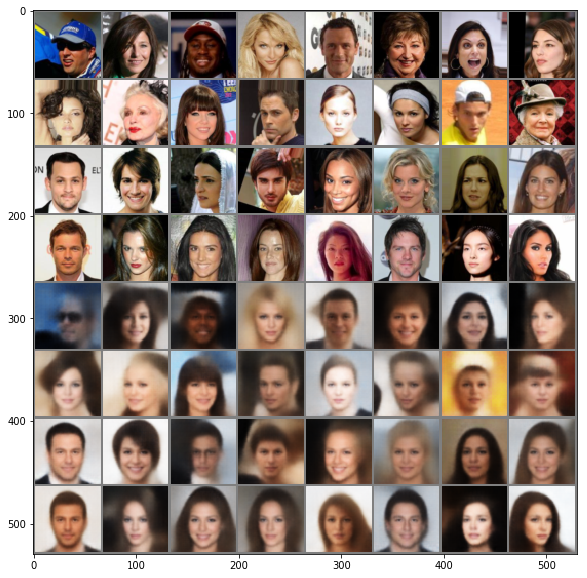

In [20]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
recon=np.rollaxis(recon.numpy(), 0, 3)  
print(recon[265:,:,:].max())
recon[:,:,:]=(recon[:,:,:]+1)/2
plt.imshow(recon[:,:,:].astype(float))
print(recon[:,:,:].min())

#MNIST
# plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
# print(recon.numpy()[0, :, :].max())
plt.savefig(path+"/recon.png")



In [21]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        #print(np.sum(cov**2) )
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor,tcov)
trainer.evaluate(test_loader)

#PVAE
#16  12.551628477254491 2.2266025315596838e-05 Valid Loss: 220.690, Recon Error: 0.185
#32  32.79880483590873 0.26285673431150475 Valid Loss: 68.768, Recon Error: 0.0145
#64 35.2 0.498 0.036

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


80.36816269496701 1.0764143639390573
Valid Loss: 343.658, Recon Error: 0.040


(343.65831751793434, tensor(0.0399, device='cuda:0', grad_fn=<DivBackward0>))

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


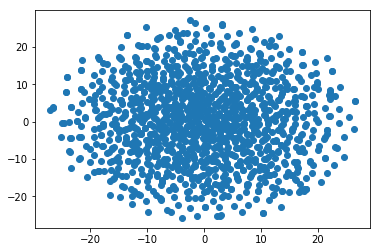

In [22]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

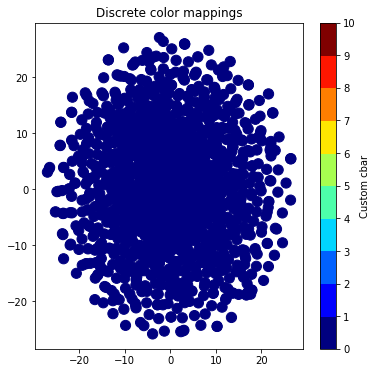

In [23]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')

plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

1.0


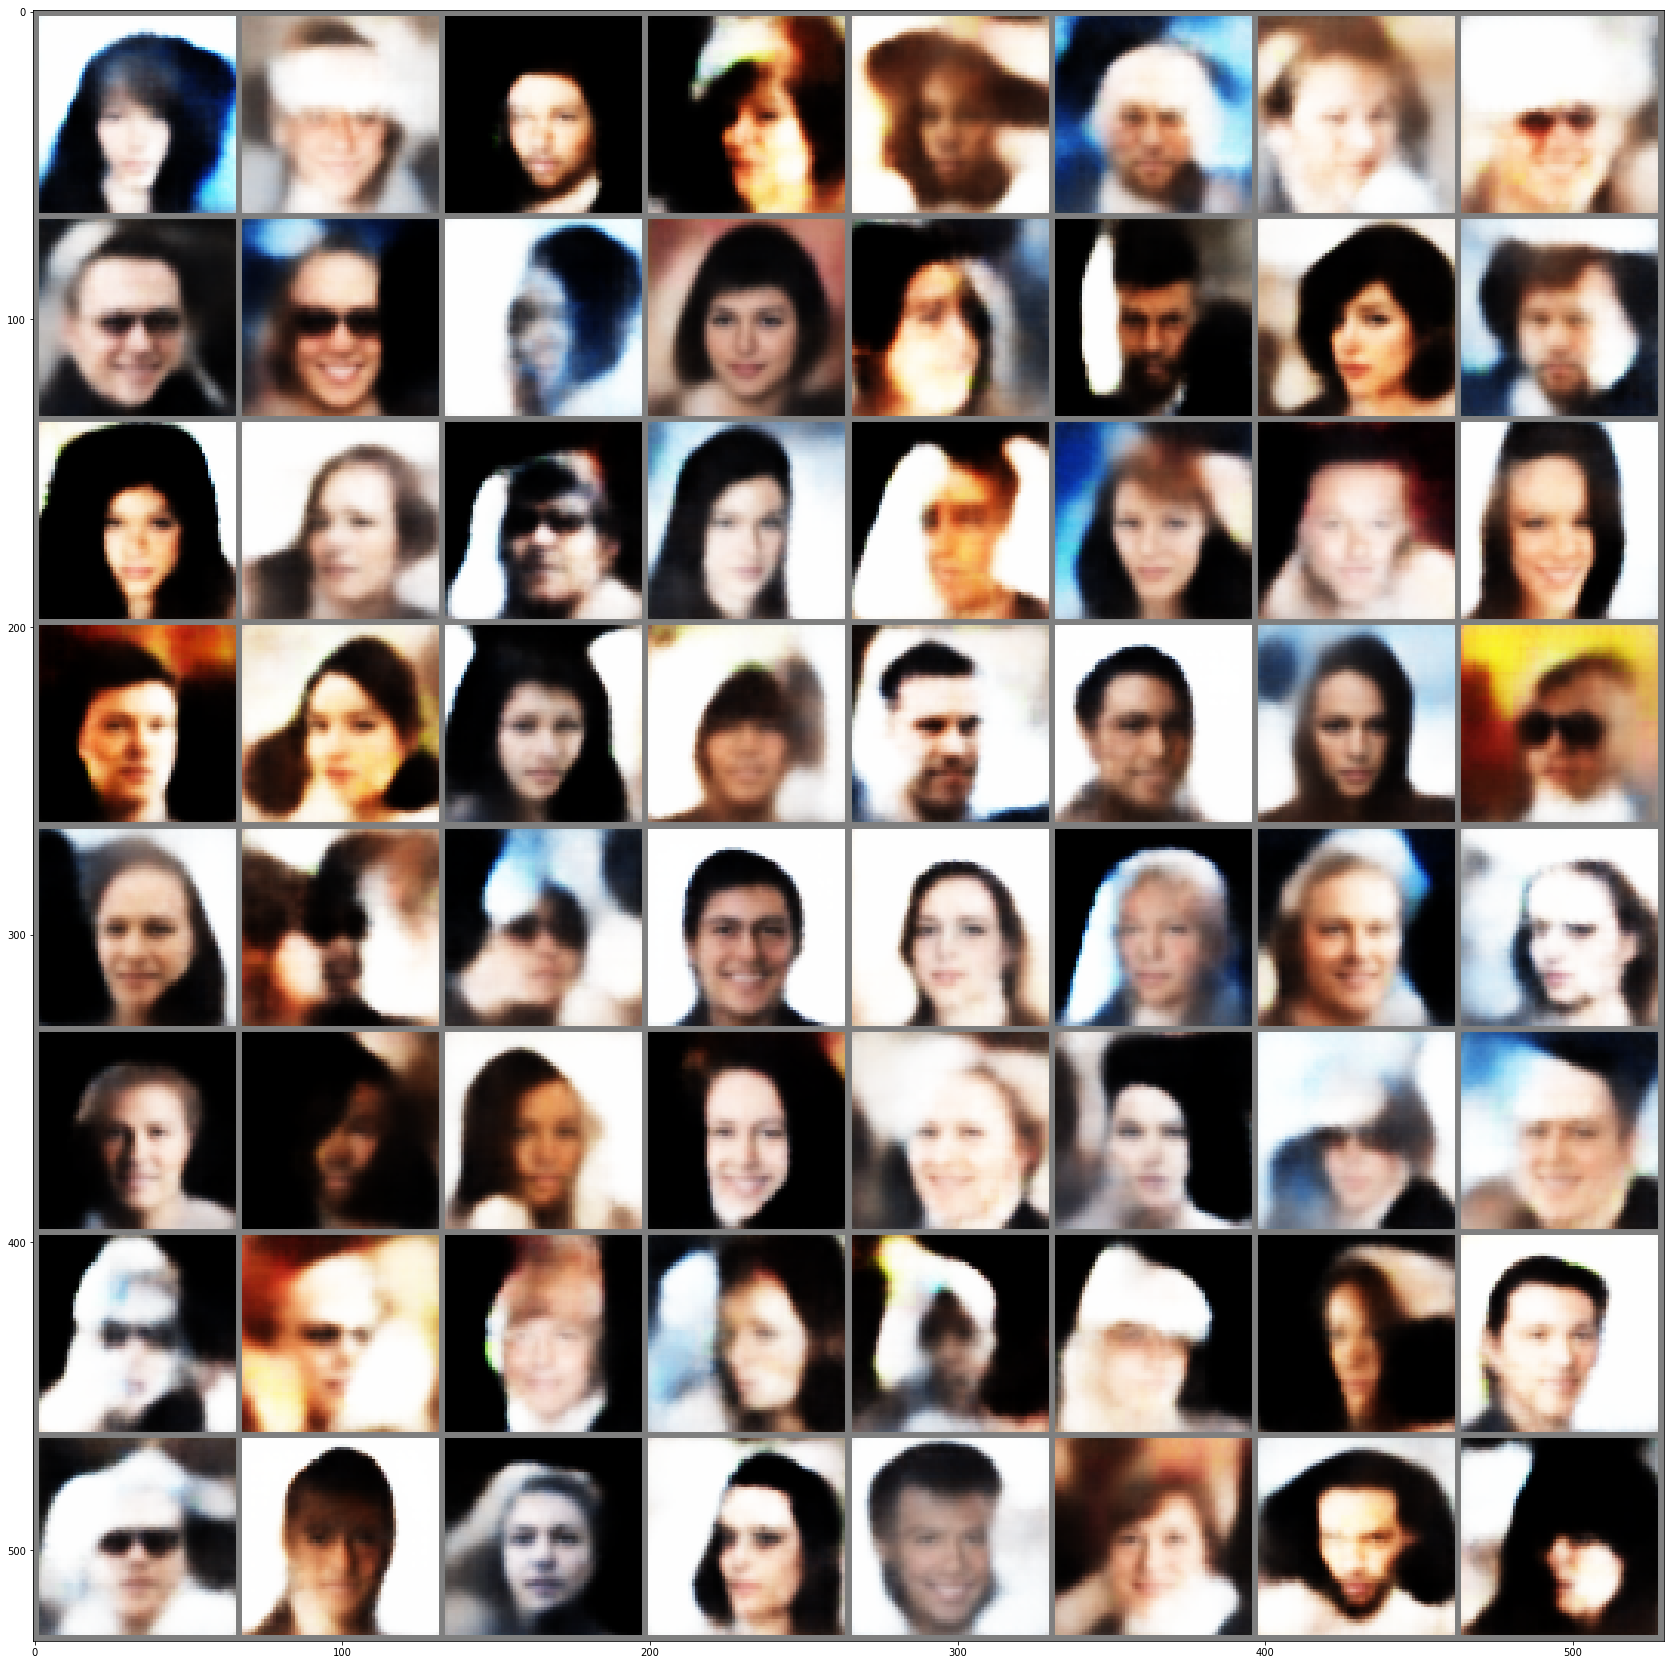

In [24]:
# Plot samples
import matplotlib as mpl

#MNIST
# samples = viz.samples()
# sample=samples.numpy()[0, :, :]/2+0.5
# plt.imshow(sample, cmap='gray')
# plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

# face
fig = plt.figure(figsize=(30, 30)) 
samples = viz.samples()
samples = np.rollaxis(samples.numpy(), 0, 3)  
print(samples[:,:,0].max())
samples=(samples+1)/2
plt.imshow(samples.astype(float),norm = norm)
plt.imsave(path+"/samples",samples)
###DIP

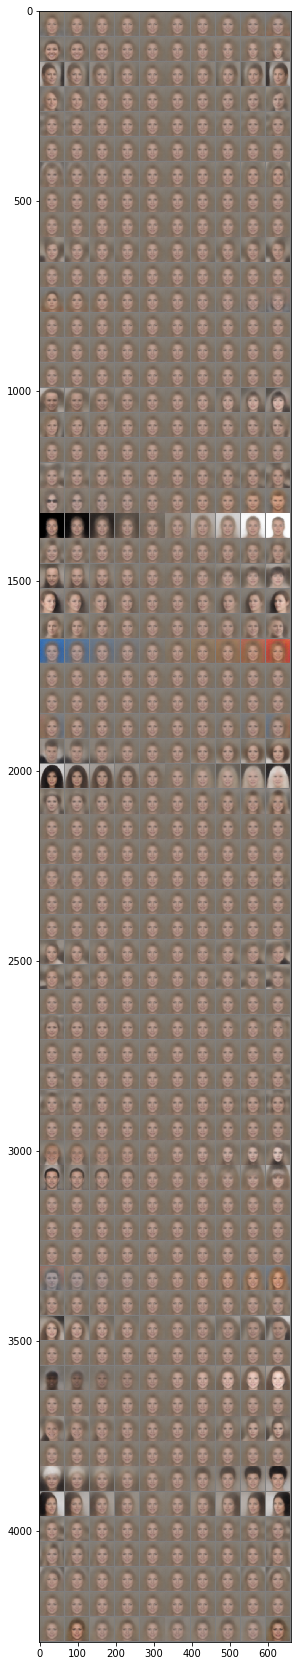

In [25]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)  
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

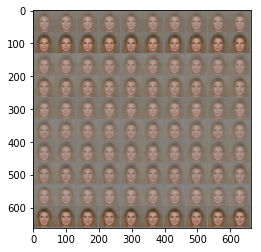

In [26]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

# traversals.numpy()[0, :, :].max()
#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous


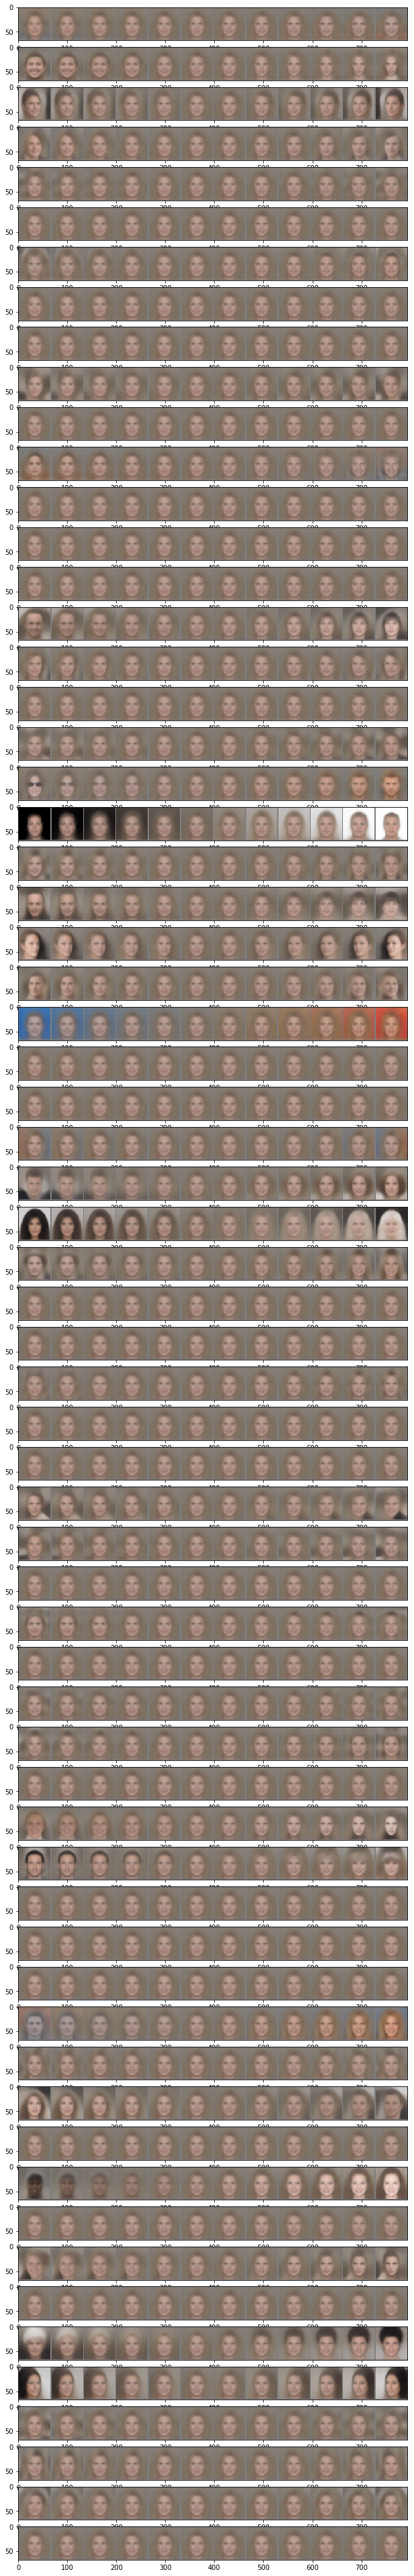

In [27]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     plt.savefig(path+"/cont{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_cont, 1, i + 1)
    traversals=(traversals+1)/2
    plt.imshow(traversals)   
plt.savefig(path+"/cont.png")
   

discrete


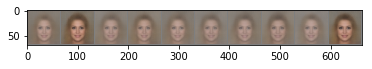

In [28]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
#     sub = fig.add_subplot(n_disc, 1, i + 1)
#     plt.savefig(path+"/disc{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_disc, 1, i + 1)
traversals=(traversals+1)/2
plt.savefig(path+"/disc{}.png".format(i))
plt.imshow(traversals)

In [29]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
        generated = (generated +1)/2
        print(generated.min(),generated.max())
        plt.imshow(generated)

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
            result = model.decode(latent_samples).cpu()
        return result

#MNIST
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         plt.imshow(generated.detach().numpy(),cmap="gray")

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#         return model.decode(latent_samples).cpu()

In [30]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)

interactive(children=(IntSlider(value=32, description='cont_idx', max=64), FloatSlider(value=0.0, description=…